In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from scipy import stats
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
data.dropna(inplace=True)
data.describe()    

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.088206,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,0.283665,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,0.000000,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,0.000000,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,0.000000,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,0.000000,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [5]:
data = data.dropna()

In [6]:
data['bad'].value_counts()

0    1840
1     178
Name: bad, dtype: int64

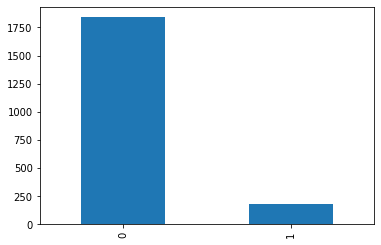

In [7]:
data['bad'].value_counts().plot.bar()

In [8]:
df = data.copy()
dms = pd.get_dummies(data[['reason','job']])
dms.head()
X_ = data.drop(['bad','reason','job'], axis=1).astype('float64')
X_.head()
X = pd.concat([X_, dms[['job_Mgr','reason_DebtCon','job_Office','job_ProfEx','job_Sales','job_Self']]], axis=1)
X = pd.concat([X, df[['bad']]], axis=1)
data = X.copy()
data

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,reason_DebtCon,job_Office,job_ProfEx,job_Sales,job_Self,bad
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0,0
158,23900.0,140328.0,183533.0,8.0,0.0,0.0,322.79,0.0,17.0,45.413,1,0,0,0,0,0,0
159,19700.0,70709.0,97394.0,0.0,0.0,0.0,94.86,0.0,17.0,25.557,1,1,0,0,0,0,0
160,17300.0,79412.0,114906.0,17.0,0.0,0.0,247.36,4.0,30.0,36.536,1,1,0,0,0,0,0
161,11700.0,78157.0,103016.0,1.0,0.0,0.0,69.81,2.0,24.0,38.448,1,1,0,0,0,0,0
162,25300.0,51261.0,87025.0,4.0,0.0,0.0,249.84,2.0,25.0,31.659,1,1,0,0,0,0,0


In [9]:
y = data['bad']
X = data.drop(['bad'], axis = 1)

In [10]:
loj = sm.Logit(y,X) 
loj_model = loj.fit() 
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.255671
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                           15
Date:                Sun, 29 Sep 2019   Pseudo R-squ.:                  0.1431
Time:                        22:00:50   Log-Likelihood:                -515.94
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 8.341e-29
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -1.932e-05   1.04e-05     -1.861      0.063   -3.97e-05    1.02e-06
mortdue        -1.385e-06   4.94e-06     -0.280      0.779   -1.11e-05     8.3e-06
value          -2.308e-06   4.18e-06     -0.553      0.580   -1.05e-05    5.88e-06
yoj               -0.0345      0.013     -2.698      0.007      -0.060      -0.009
derog              0.5416      0.126      4.314      0.000       0.296       0.788
delinq             0.7600      0.088      8.605      0.000       0.587       0.933
clage             -0.0083      0.001     -6.264      0.000      -0.011      -0.006
ninq               0.0580      0.048      1.212      0.226      -0.036       0.152
clno              -0.0413      0.011     -3.822      0.000      -0.062      -0.020
debtinc            0.0235      0.007      3.303      0.001       0.010       0.037
job_Mgr           -0.0941      0.256     -0.367      0.714      -0.597       0.409
reason_DebtCon    -0.4757      0.177     -2.690      0.007      -0.822      -0.129
job_Office        -0.6638      0.270     -2.459      0.014      -1.193      -0.135
job_ProfEx        -0.2196      0.242     -0.907      0.364      -0.694       0.255
job_Sales          1.0547      0.556      1.898      0.058      -0.035       2.144
job_Self           0.9778      0.518      1.887      0.059      -0.038       1.993
==================================================================================
"""

In [11]:
y = data["bad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1816, 16), (1816,), (202, 16), (202,))

In [12]:
X_train.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,reason_DebtCon,job_Office,job_ProfEx,job_Sales,job_Self
202,11900.0,89595.0,107895.0,9.0,0.0,0.0,250.47,0.0,24.0,30.305,1,0,0,0,0,0
367,8800.0,78953.0,93018.0,7.0,0.0,0.0,110.72,0.0,22.0,28.289,1,1,0,0,0,0
1545,26200.0,149599.0,181869.0,1.0,0.0,0.0,204.03,0.0,35.0,39.801,0,1,0,0,0,0
2197,20400.0,29985.0,54038.0,15.0,0.0,0.0,177.59,1.0,20.0,35.554,0,1,0,1,0,0
1696,25400.0,149364.0,210724.0,10.0,0.0,0.0,266.51,1.0,34.0,41.618,0,0,0,0,0,0


In [13]:
X_train = X_train.drop(['loan','mortdue','value','ninq','job_Mgr','job_ProfEx','job_Sales','job_Self'], axis = 1)
X_test = X_test.drop(['loan','mortdue','value','ninq','job_Mgr','job_ProfEx','job_Sales','job_Self'], axis = 1)

In [14]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = loj_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [21]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
print("fpr: ",fpr[0:10])
print("tpr: ",tpr[0:10])
print("thresholds: ",thresholds[0:10])

fpr:  [0.         0.         0.         0.00054348 0.00054348 0.00108696
 0.00108696 0.00217391 0.00217391 0.00271739]
tpr:  [0.         0.00561798 0.11797753 0.11797753 0.12359551 0.12359551
 0.17977528 0.17977528 0.18539326 0.18539326]
thresholds:  [1.99973908 0.99973908 0.76292819 0.74436268 0.74206409 0.73397378
 0.59270656 0.57128801 0.56304834 0.55390221]


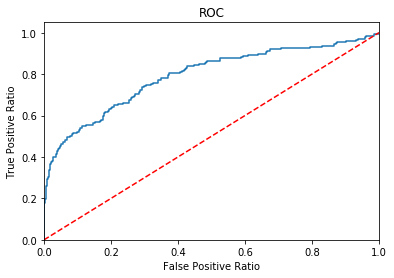

In [22]:
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()